In [1]:
import pandas as pd


In [5]:
mall = pd.read_csv('F:\Skillenable\Data frames\Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [16]:
# Find avg income  based on gender
avg_income = mall.groupby('Gender')[['Annual Income (k$)']].mean().reset_index()
avg_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


In [14]:
# find avg spending based on gender
avg_spending = mall.groupby('Gender')[['Spending Score (1-100)']].mean().reset_index()
avg_spending

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


In [46]:
# do some plotting before building the model

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

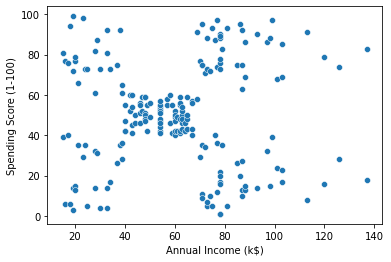

In [18]:
sns.scatterplot(mall['Annual Income (k$)'], mall['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

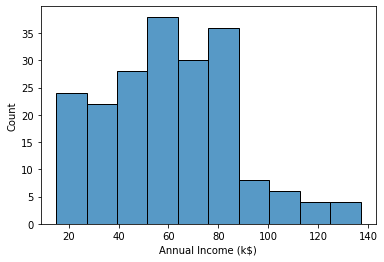

In [20]:
sns.histplot(mall['Annual Income (k$)'])

In [21]:
# dropping customer id
mall.drop(columns= ['CustomerID'], inplace = True)
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
# create dummy veriable
mall_final = pd.get_dummies(mall, columns = ["Gender"], drop_first=True)
mall_final

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [24]:
# Build the cluster model
from sklearn.cluster import KMeans


* Ploting the elbow value first



In [29]:
# range function 
for i in range (1,11):
    print (i)

1
2
3
4
5
6
7
8
9
10


In [32]:
# prepare data
error = []
for k in range (1,11):
    km = KMeans(n_clusters = k)
    km.fit(mall_final) # give data
    error.append(km.inertia_) #to get error
    

C:\Users\arun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
error

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58350.65449462816,
 51167.197368421024,
 44389.80767355767,
 40986.577706239834,
 37175.976699941166]

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

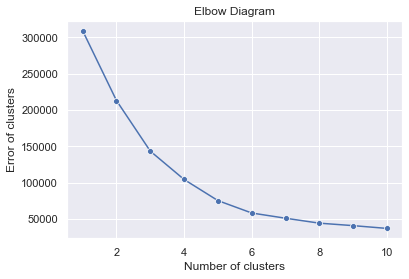

In [47]:
# Plot the elbow curve/diagram
sns.lineplot(range(1,11), error, marker='o')
plt.title('Elbow Diagram')
plt.xlabel('Number of clusters')
plt.ylabel('Error of clusters')
plt.show

In [51]:
# Select 5 cluster points cause elbow curve tends to falt after 5 points
# Build model with 5 cluster points
km_5 = KMeans(n_clusters= 5).fit(mall_final)

In [53]:
clusters = km_5.fit_predict(mall_final)

In [56]:
# creating new column 
mall['cluster'] = clusters
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [59]:
# identify how many values in each cluster
mall['cluster'].value_counts()

2    78
1    39
0    37
4    23
3    23
Name: cluster, dtype: int64

In [60]:
# identify individual cluster
mall.groupby('cluster')[['Annual Income (k$)','Age','Spending Score (1-100)']].mean()

,Annual Income (k$),Age,Spending Score (1-100)
cluster,,,
0,87.432432,40.324324,18.189189
1,86.538462,32.692308,82.128205
2,55.025641,43.282051,49.692308
3,26.304348,25.521739,78.565217
4,26.304348,45.217391,20.913043


C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

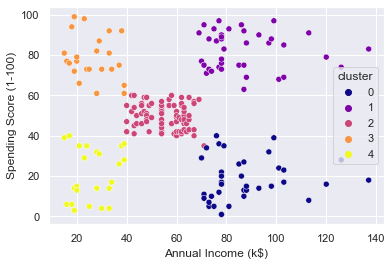

In [61]:
# plot a scatter plot for the the same we just done

sns.scatterplot(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], hue= mall['cluster'], palette='plasma')